In [17]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from Function import Correlations

In [18]:
df = pd.read_csv('publications_clean.csv')
df.head()

,id,is_new,car_year,brand,brand_cod,model,model_cod,version,engine,engine_power,...,passenger_capacity,transmission,transmission_cod,usd_price,is_car_shop,seller_country,seller_state,seller_city,Latitude,longitude
0,MLA1413685801,0,2013,Volkswagen,7,Gol,28,1.4 Power 83cv 3 p,1.4,83.0,...,5.0,Manual,2,5882.352941,0,Argentina,Buenos Aires,Vicente López,-34.524448,-58.503628
1,MLA1406864357,0,2012,Volkswagen,7,Gol,28,1.4 Power Ps+ac 83cv,1.4,83.0,...,5.0,Manual,2,10500.000000,0,Argentina,Buenos Aires,Vicente López,-34.524448,-58.503628
2,MLA1677544030,0,2012,Volkswagen,7,Gol,28,1.4 Power Ps+ac 83cv,1.4,83.0,...,5.0,Manual,2,5686.274510,0,Argentina,Buenos Aires,Berazategui,-34.763268,-58.211660
3,MLA1411523777,0,2008,Volkswagen,7,Gol,28,1.6 I Comfortline 60a,1.6,83.0,...,5.0,Manual,2,4584.803922,0,Argentina,Buenos Aires,Vicente López,-34.524448,-58.503628
4,MLA1411397265,0,2012,Volkswagen,7,Gol,28,1.4 Power Ps+ac 83cv,1.4,83.0,...,5.0,Manual,2,4460.784314,0,Argentina,Buenos Aires,Lomas de Zamora,-34.757258,-58.402664


## EDA

### Analisis de correlaciones

#### Correlacion de Pearson

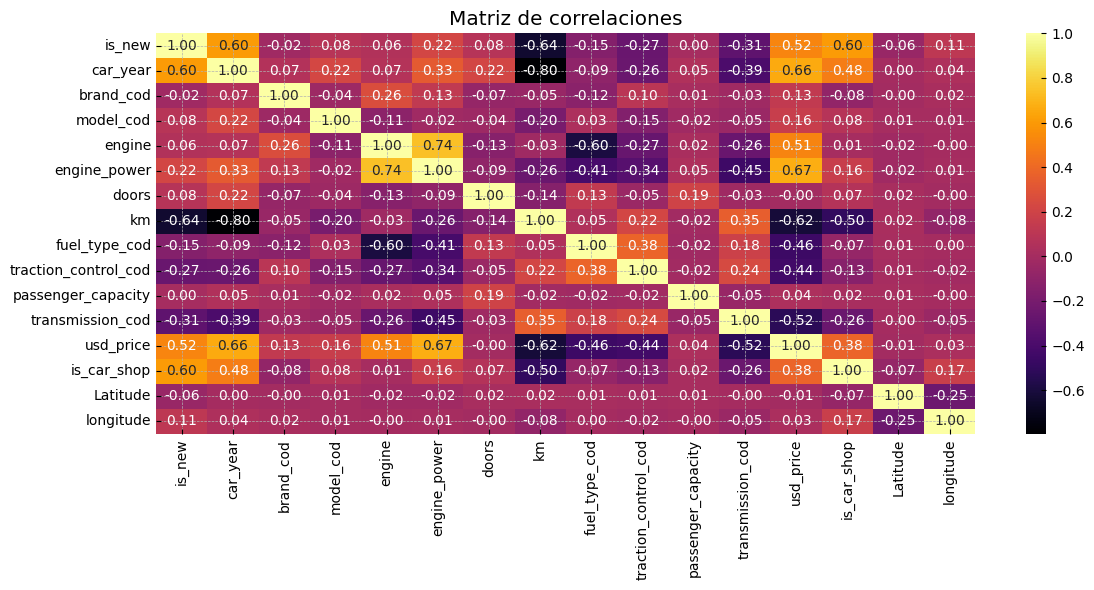

In [19]:
#MATRIZ DE CORRELACION DE PEARSON
plt.figure(figsize=(12,6))
matrix = df.corr(numeric_only=True)
sns.heatmap(matrix, fmt='.2f', annot=True, cmap='inferno')
plt.title('Matriz de correlaciones')
plt.tight_layout()
plt.show()

#### Coeficiente de contingencia

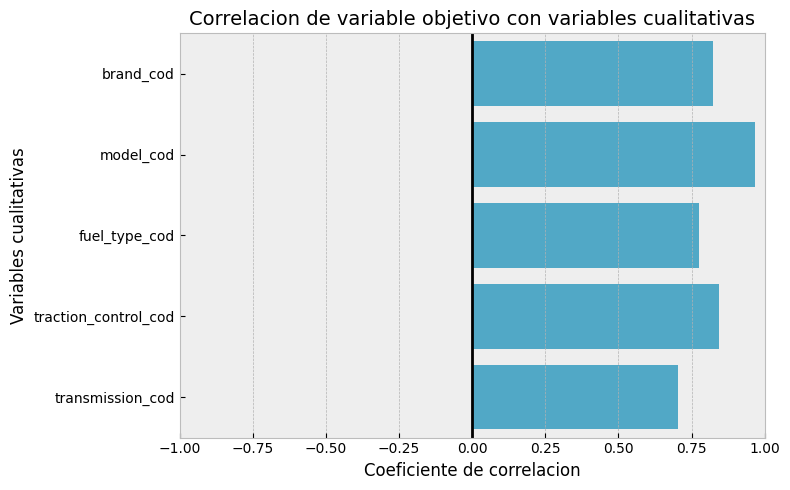

In [20]:
#COEFICIENTE DE CONTINGENCIA PARA VARIABLES CUALITATIVAS VS USD_PRICE
vars = ['brand_cod', 'model_cod', 'fuel_type_cod', 'traction_control_cod', 'transmission_cod']
Correlations(df, 'usd_price', vars, 'cualitativas').plot_contingency_coef()

### Graficos de exploracion

#### Analisis univariado

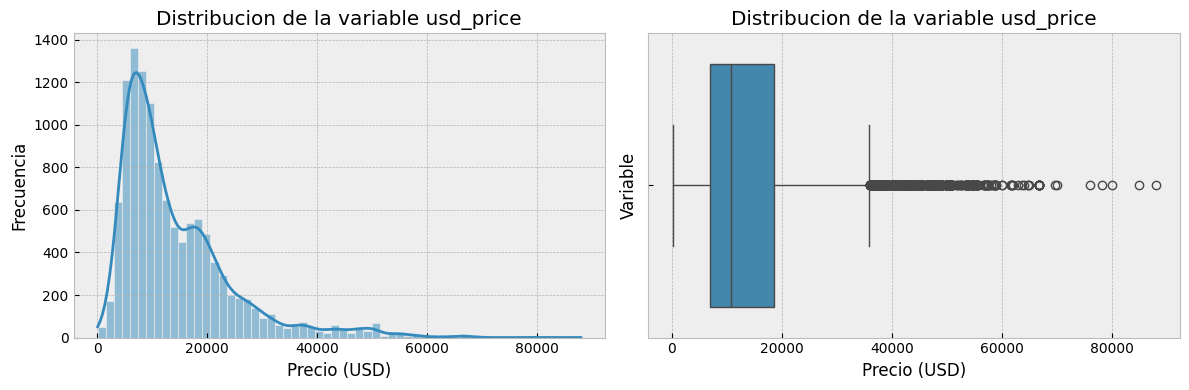

In [21]:
#DISTRIBUCION DE LA VARIABLE USD_PRICE
mpl.style.use('bmh')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
sns.histplot(df.usd_price, kde=True, bins=60, ax=ax[0])
ax[0].set_title('Distribucion de la variable usd_price')
ax[0].set_xlabel('Precio (USD)')
ax[0].set_ylabel('Frecuencia')
#ax[0].grid(True)

sns.boxplot(df.usd_price, orient='h' ,ax=ax[1])
ax[1].set_title('Distribucion de la variable usd_price')
ax[1].set_xlabel('Precio (USD)')
ax[1].set_ylabel('Variable')
#ax[1].grid(True)

plt.tight_layout()
plt.show()
mpl.style.use('default')

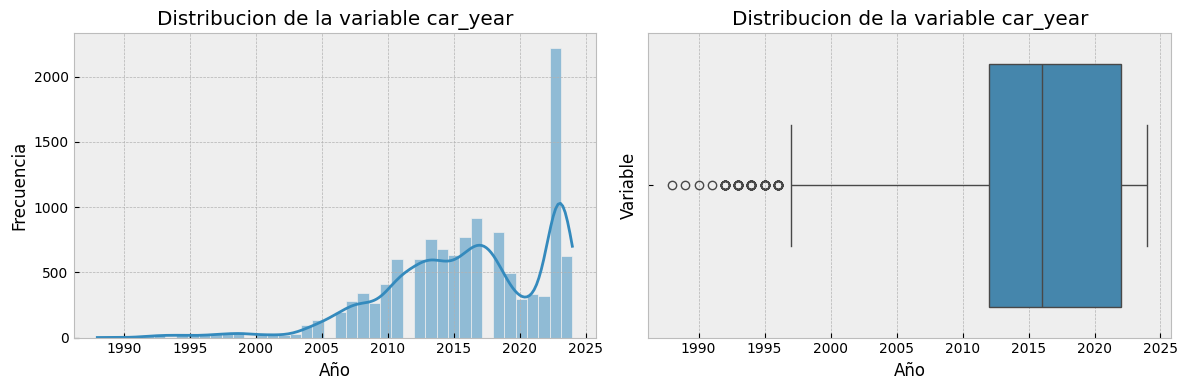

In [22]:
#DISTRIBUCION DE LA VARIABLE CAR_YEAR
mpl.style.use('bmh')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
sns.histplot(df.car_year, kde=True, ax=ax[0])
ax[0].set_title('Distribucion de la variable car_year')
ax[0].set_xlabel('Año')
ax[0].set_ylabel('Frecuencia')

sns.boxplot(df.car_year, orient='h' ,ax=ax[1])
ax[1].set_title('Distribucion de la variable car_year')
ax[1].set_xlabel('Año')
ax[1].set_ylabel('Variable')
plt.tight_layout()
plt.show()
mpl.style.use('default')

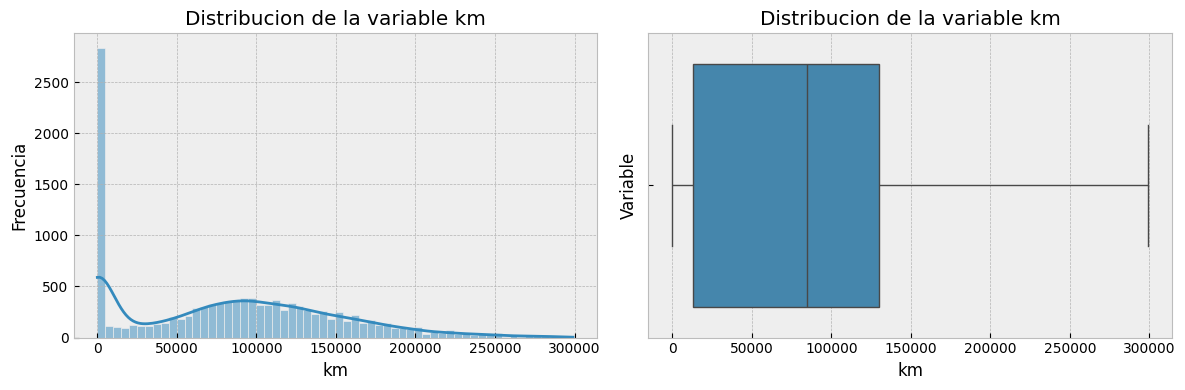

In [23]:
#DISTRIBUCION DE LA VARIABLE KM
mpl.style.use('bmh')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
sns.histplot(df.km, kde=True, bins=60, ax=ax[0])
ax[0].set_title('Distribucion de la variable km')
ax[0].set_xlabel('km')
ax[0].set_ylabel('Frecuencia')

sns.boxplot(df.km, orient='h' ,ax=ax[1])
ax[1].set_title('Distribucion de la variable km')
ax[1].set_xlabel('km')
ax[1].set_ylabel('Variable')
plt.tight_layout()
plt.show()
mpl.style.use('default')

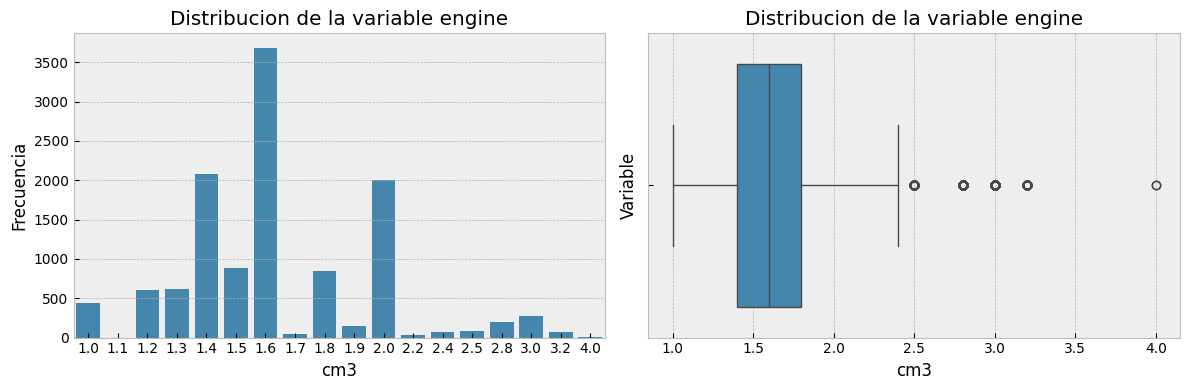

In [24]:
#DISTRIBUCION DE LA VARIABLE ENGINE
mpl.style.use('bmh')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
sns.countplot(x=df.engine.sort_values().astype(str), ax=ax[0])
ax[0].set_title('Distribucion de la variable engine')
ax[0].set_xlabel('cm3')
ax[0].set_ylabel('Frecuencia')

sns.boxplot(df.engine, orient='h' ,ax=ax[1])
ax[1].set_title('Distribucion de la variable engine')
ax[1].set_xlabel('cm3')
ax[1].set_ylabel('Variable')
plt.tight_layout()
plt.show()
mpl.style.use('default')


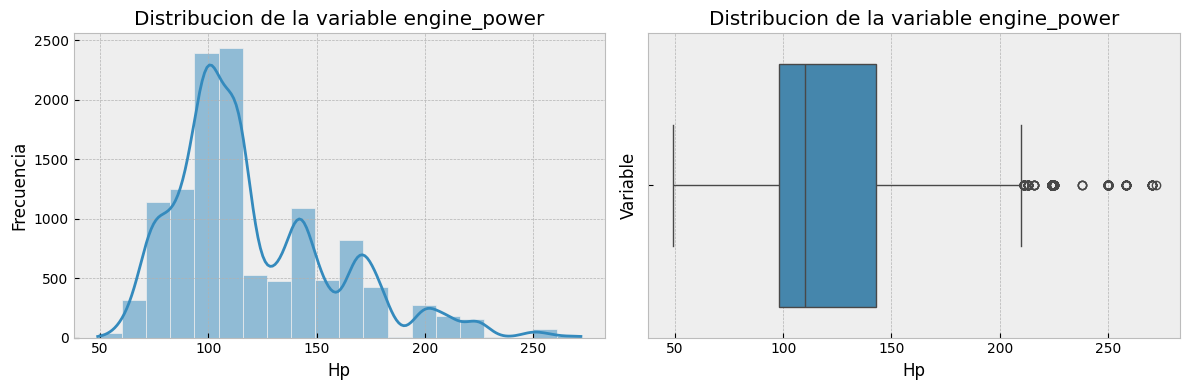

In [25]:
#DISTRIBUCION DE LA VARIABLE ENGINE_POWER
mpl.style.use('bmh')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
sns.histplot(df.engine_power, kde=True, bins=20, ax=ax[0])
ax[0].set_title('Distribucion de la variable engine_power')
ax[0].set_xlabel('Hp')
ax[0].set_ylabel('Frecuencia')

sns.boxplot(df.engine_power, orient='h' ,ax=ax[1])
ax[1].set_title('Distribucion de la variable engine_power')
ax[1].set_xlabel('Hp')
ax[1].set_ylabel('Variable')
plt.tight_layout()
plt.show()
mpl.style.use('default')

#### Analisis bivariado

In [26]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

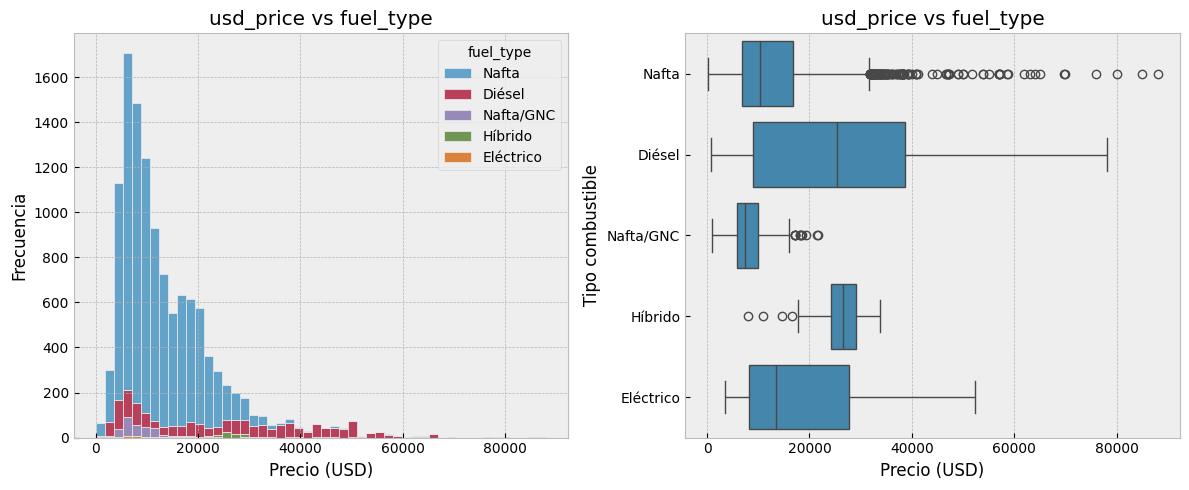

In [27]:
#USD_PRICE VS FUEL_TYPE
mpl.style.use('bmh')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
sns.histplot(x=df.usd_price, hue=df.fuel_type, multiple='stack', bins=50, ax=ax[0])
ax[0].set_title('usd_price vs fuel_type')
ax[0].set_xlabel('Precio (USD)')
ax[0].set_ylabel('Frecuencia')

sns.boxplot(y=df.fuel_type, x=df.usd_price, ax=ax[1])
ax[1].set_title('usd_price vs fuel_type')
ax[1].set_xlabel('Precio (USD)')
ax[1].set_ylabel('Tipo combustible')

plt.tight_layout()
plt.show()
mpl.style.use('default')

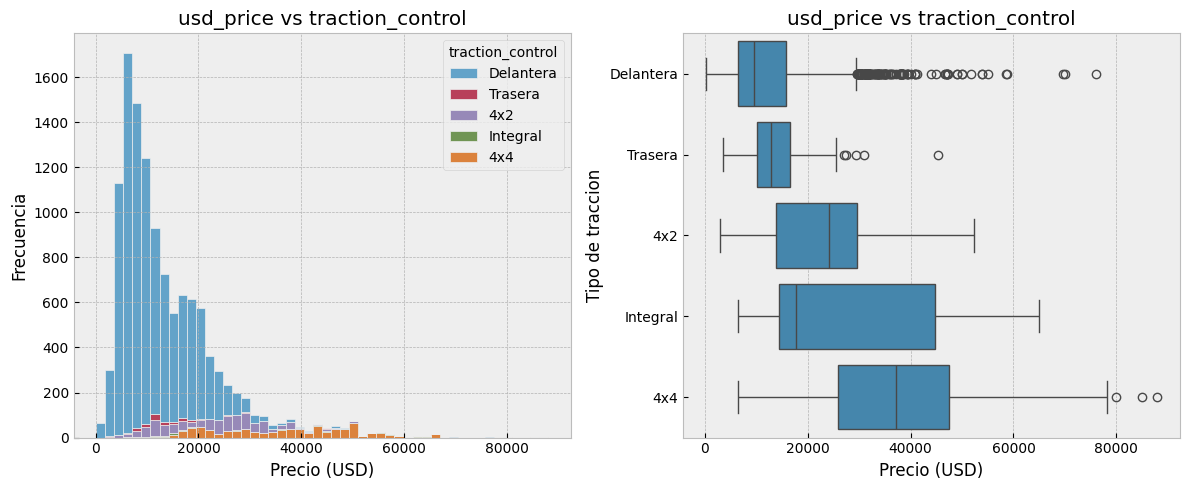

In [28]:
#USD_PRICE VS TRACCION_CONTROL
mpl.style.use('bmh')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
sns.histplot(x=df.usd_price, hue=df.traction_control, multiple='stack', bins=50, ax=ax[0])
ax[0].set_title('usd_price vs traction_control')
ax[0].set_xlabel('Precio (USD)')
ax[0].set_ylabel('Frecuencia')

sns.boxplot(y=df.traction_control, x=df.usd_price, ax=ax[1])
ax[1].set_title('usd_price vs traction_control')
ax[1].set_xlabel('Precio (USD)')
ax[1].set_ylabel('Tipo de traccion')

plt.tight_layout()
plt.show()
mpl.style.use('default')

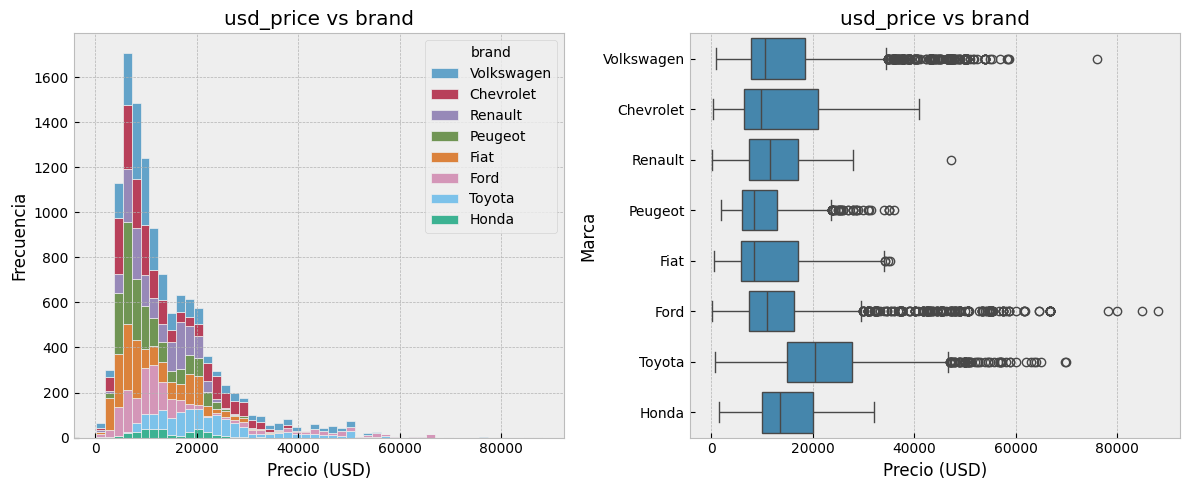

In [29]:
#USD_PRICE VS BRAND
mpl.style.use('bmh')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
sns.histplot(x=df.usd_price, hue=df.brand, multiple='stack', bins=50, ax=ax[0])
ax[0].set_title('usd_price vs brand')
ax[0].set_xlabel('Precio (USD)')
ax[0].set_ylabel('Frecuencia')

sns.boxplot(x=df.usd_price, y=df.brand, ax=ax[1])
ax[1].set_title('usd_price vs brand')
ax[1].set_xlabel('Precio (USD)')
ax[1].set_ylabel('Marca')

plt.tight_layout()
plt.show()
mpl.style.use('default')

In [44]:
df.is_new.value_counts()

is_new
0    9600
1    2489
Name: count, dtype: int64

In [39]:
data = df.groupby(['car_year', 'brand'])['usd_price'].mean().round(2).reset_index(name='avg_price')

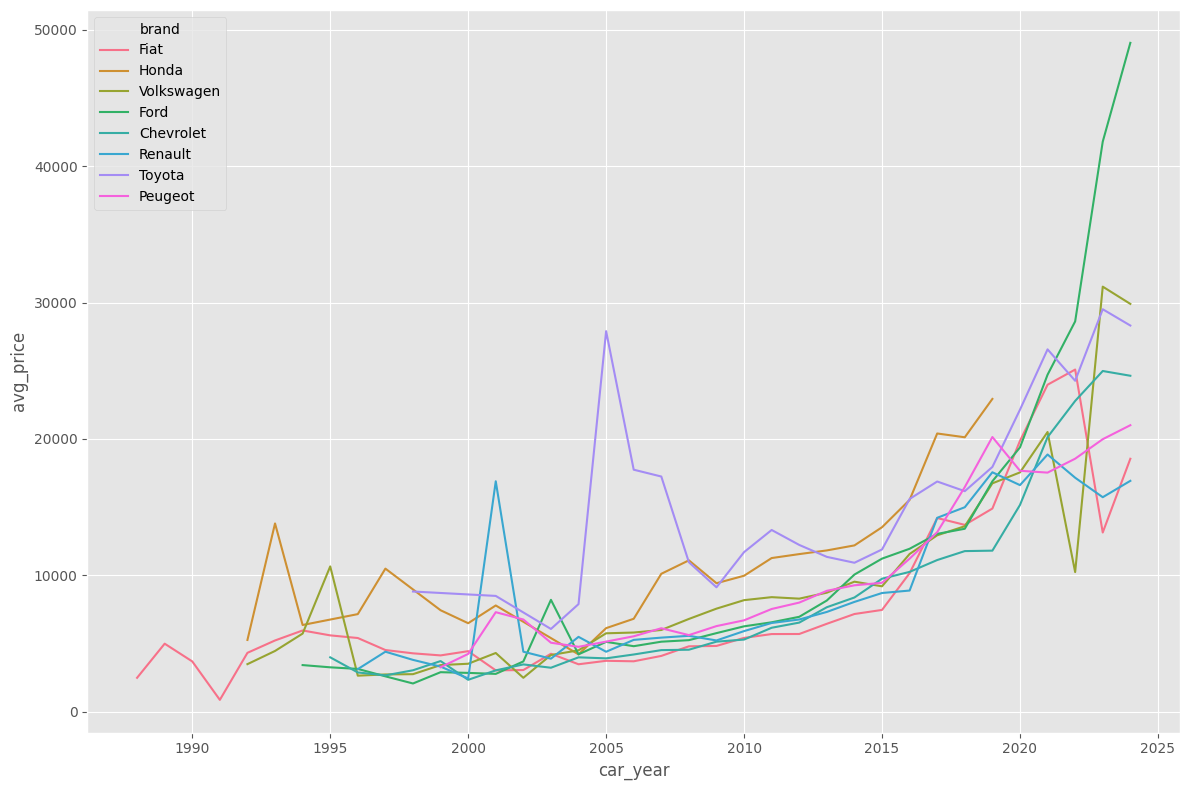

In [43]:
mpl.style.use('ggplot')
plt.figure(figsize=(12,8))
sns.lineplot(data=data, x='car_year', y='avg_price', hue='brand', markers=True, dashes=False)
plt.tight_layout()
plt.show()
mpl.style.use('default')

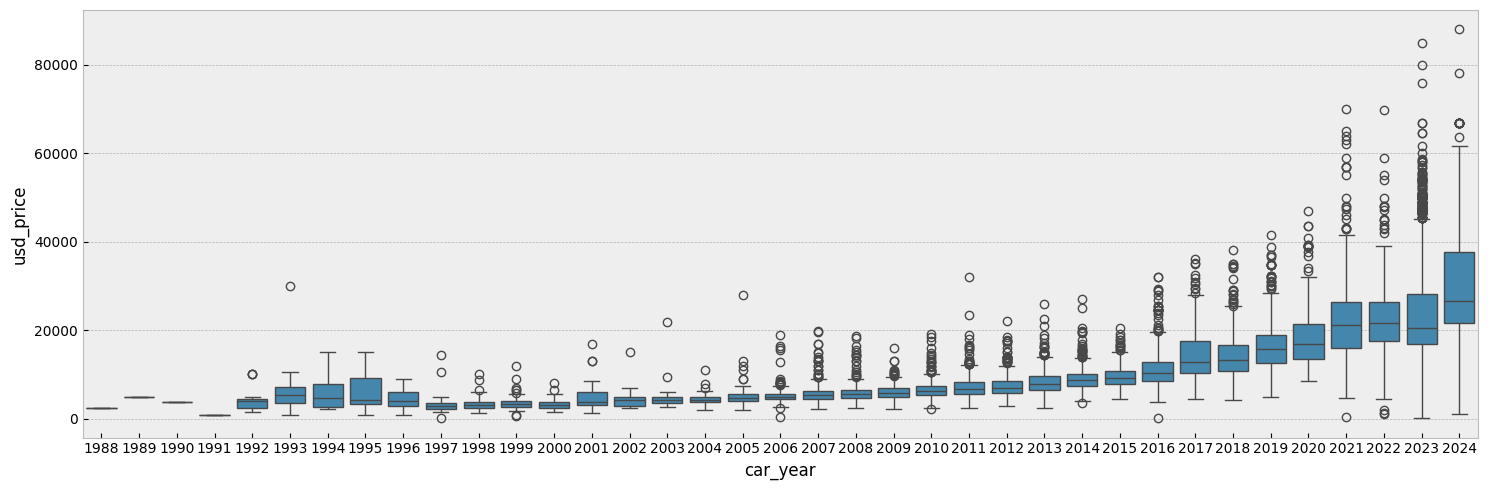

In [35]:
mpl.style.use('bmh')
plt.figure(figsize=(15,5))
sns.boxplot(y=df.usd_price, x=df.car_year)
plt.tight_layout()
plt.show()
mpl.style.use('default')